# Kaggle Facial Keypoints Detection
---

In [ ]:
#!pip install --upgrade --no-cache-dir gdown

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [ ]:
#!gdown https://drive.google.com/uc?id=1Ee3qKH7aUpB3eUQP-nUiJyJECoTzVAU1

In [ ]:
#!unzip /content/facial-keypoints-detection.zip

In [ ]:
df = pd.read_csv('/content/facial-keypoints-detection/training.csv')
df.shape

(7049, 31)

In [ ]:
df.head()

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7049 entries, 0 to 7048
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          7039 non-null   float64
 1   left_eye_center_y          7039 non-null   float64
 2   right_eye_center_x         7036 non-null   float64
 3   right_eye_center_y         7036 non-null   float64
 4   left_eye_inner_corner_x    2271 non-null   float64
 5   left_eye_inner_corner_y    2271 non-null   float64
 6   left_eye_outer_corner_x    2267 non-null   float64
 7   left_eye_outer_corner_y    2267 non-null   float64
 8   right_eye_inner_corner_x   2268 non-null   float64
 9   right_eye_inner_corner_y   2268 non-null   float64
 10  right_eye_outer_corner_x   2268 non-null   float64
 11  right_eye_outer_corner_y   2268 non-null   float64
 12  left_eyebrow_inner_end_x   2270 non-null   float64
 13  left_eyebrow_inner_end_y   2270 non-null   float

In [ ]:
df.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

In [ ]:
df = df.dropna()

In [ ]:
# 이미지 데이터를 넘파이배열로 변화

df_image = df['Image']
df_image[0]

'238 236 237 238 240 240 239 241 241 243 240 239 231 212 190 173 148 122 104 92 79 73 74 73 73 74 81 74 60 64 75 86 93 102 100 105 109 114 121 127 132 134 137 137 140 139 138 137 137 140 141 143 144 147 148 149 147 147 148 145 147 144 146 147 147 143 134 130 130 128 116 104 98 90 82 78 85 88 86 80 77 87 108 111 115 128 133 188 242 252 250 248 251 250 250 250 235 238 236 238 238 237 238 242 241 239 237 233 215 195 187 156 119 103 93 78 68 73 75 75 72 75 70 61 66 77 91 96 106 108 113 120 125 131 134 138 135 138 139 145 144 144 142 140 141 141 148 147 150 149 152 151 149 150 147 148 144 148 144 146 146 143 139 128 132 135 128 112 104 97 87 78 79 83 85 83 75 75 89 109 111 117 117 130 194 243 251 249 250 249 250 251 237 236 237 238 237 238 241 238 238 238 241 221 195 187 163 124 106 95 81 68 70 73 73 72 73 69 65 74 82 94 103 110 111 119 127 135 140 139 144 144 145 143 143 143 146 144 144 147 146 148 147 150 146 147 150 150 149 147 147 144 147 144 149 146 144 144 144 140 131 133 133 125 110 

In [ ]:
t = np.fromstring(df_image[0], dtype='int', sep=' ') #df_image[0] 에 있는 문자열을 공백문자 단위로 하나씩 끊어서 정수 형태로 저장

print(t)
print(len(t))

[238 236 237 ...  70  75  90]
9216


In [ ]:
df['Image'] = df['Image'].apply(lambda x : np.fromstring(x,dtype='int',sep=' ').reshape(96,96))
df['Image']

0       [[238, 236, 237, 238, 240, 240, 239, 241, 241,...
1       [[219, 215, 204, 196, 204, 211, 212, 200, 180,...
2       [[144, 142, 159, 180, 188, 188, 184, 180, 167,...
3       [[193, 192, 193, 194, 194, 194, 193, 192, 168,...
4       [[147, 148, 160, 196, 215, 214, 216, 217, 219,...
                              ...                        
2277    [[191, 191, 191, 190, 189, 185, 184, 120, 54, ...
2278    [[19, 19, 19, 18, 13, 7, 3, 4, 3, 1, 3, 9, 11,...
2281    [[31, 40, 47, 31, 54, 58, 63, 100, 86, 80, 82,...
2282    [[7, 1, 5, 1, 3, 20, 12, 0, 5, 8, 6, 18, 13, 9...
2283    [[68, 19, 19, 23, 19, 26, 23, 16, 8, 15, 9, 9,...
Name: Image, Length: 2140, dtype: object

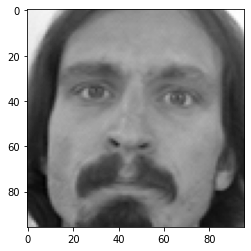

In [ ]:
plt.imshow(df['Image'][0], cmap='gray')
plt.show()

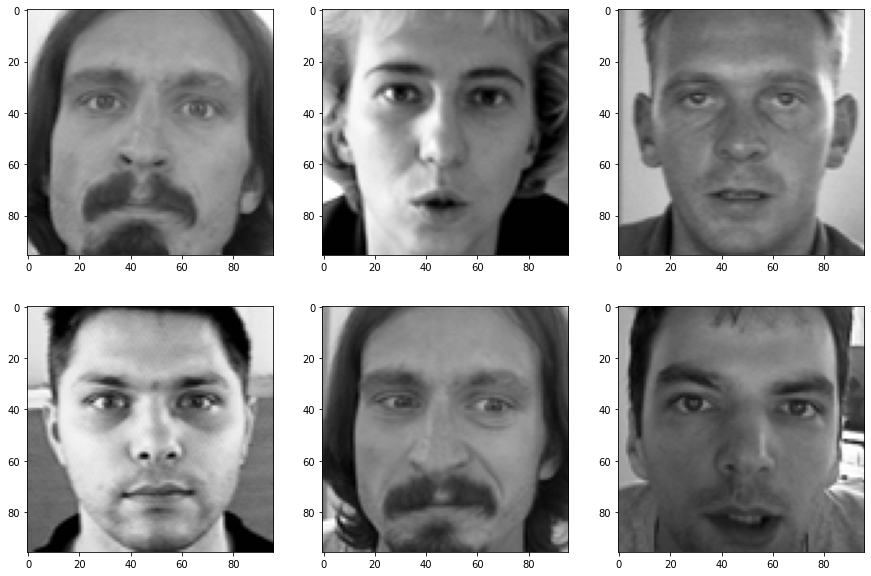

In [ ]:
plt.figure(figsize = (15,10))
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(df['Image'][i], cmap='gray')
plt.show()

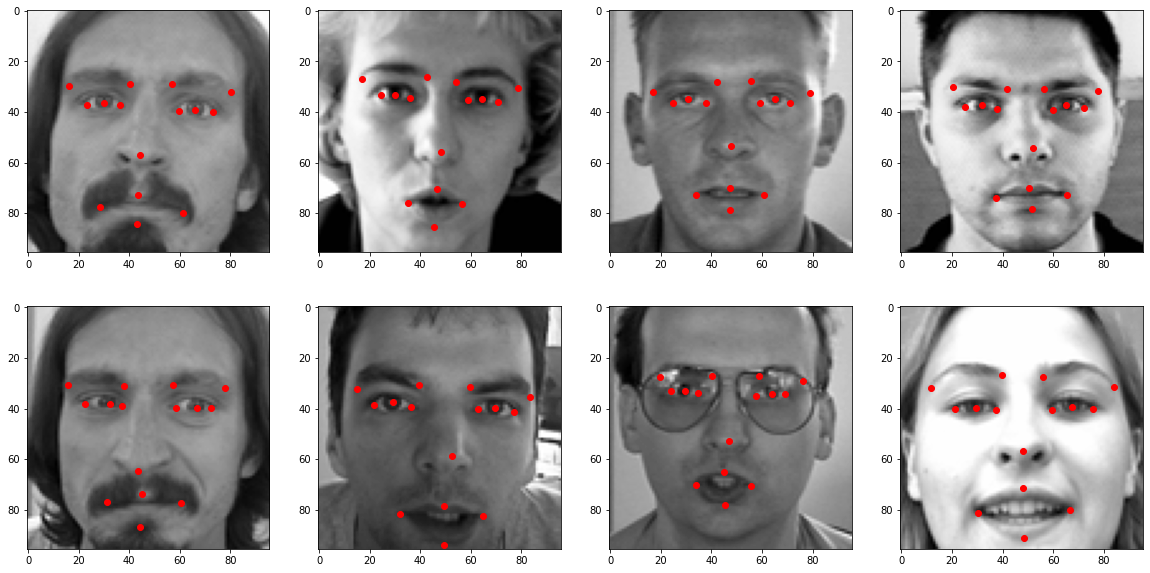

In [ ]:
# Facial Keypoints 표시

plt.figure(figsize = (20,10))
for idx in range(8):
  plt.subplot(2,4, idx+1)
  plt.imshow(df['Image'][idx], cmap='gray')
  for j in range(1,31,2):
    plt.plot(df.loc[idx][j-1],df.loc[idx][j],'ro')
plt.show()

In [ ]:
df.shape, df.shape[0]

((2140, 31), 2140)

In [ ]:
images= []

for i in range(df.shape[0]):
  img = df.iloc[i,-1]
  images.append(img)

images = np.array(images)
print(images[2])
images.shape

[[144 142 159 ... 208 207 207]
 [143 142 161 ... 208 208 207]
 [143 140 160 ... 209 209 207]
 ...
 [ 66  70  69 ...  81 134 194]
 [ 65  69  71 ...  75  83 109]
 [ 65  68  70 ...  78  78  77]]


(2140, 96, 96)

In [ ]:
y_data = df.drop('Image',axis=1)
y_data.shape

(2140, 30)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val = train_test_split(images,y_data,
                                               train_size = 0.8,
                                               )

print(X_train.shape, X_val.shape)

(1712, 96, 96) (428, 96, 96)


In [ ]:
# 이미지 정규화

X_train = X_train.astype('float')/255.
X_val = X_val.astype('float')/255.

In [ ]:
# reshape
X_train = X_train.reshape(-1,96,96,1)
X_val = X_val.reshape(-1,96,96,1)

### 모델

In [ ]:
def build_model():
  model = keras.Sequential([
      layers.Conv2D(32, (3,3), padding = 'same', use_bias = False, input_shape = (96,96,1)),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(32, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(64, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(64, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(96, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(96, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(128, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(128, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Conv2D(256, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),

      layers.Conv2D(256, (3,3), padding = 'same', use_bias = False),
      layers.ReLU(),
      layers.BatchNormalization(),
      layers.MaxPool2D((2,2)),

      layers.Flatten(),
      layers.Dense(512, activation = 'relu'),
      layers.Dense(30)
  ])

  return model

In [ ]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 96, 96, 32)        288       
                                                                 
 re_lu_10 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_10 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 96, 96, 32)        9216      
                                                                 
 re_lu_11 (ReLU)             (None, 96, 96, 32)        0         
                                                                 
 batch_normalization_11 (Bat  (None, 96, 96, 32)       128       
 chNormalization)                                     

In [ ]:
model.compile(
    optimizer = 'adam',
    loss = 'mse',
    metrics = ['mae']
)

In [ ]:
EPOCHS = 30
BATCH_SIZE = 32

model.fit(X_train, y_train, 
          epochs = EPOCHS, 
          batch_size = BATCH_SIZE,
          validation_data = (X_val, y_val),
          verbose = 1)

Epoch 1/30
54/54 [==============================] - 2s 34ms/step - loss: 1.7328 - mae: 0.9856 - val_loss: 4.3945 - val_mae: 1.6039
Epoch 2/30
54/54 [==============================] - 2s 32ms/step - loss: 1.8698 - mae: 1.0444 - val_loss: 3.8238 - val_mae: 1.4756
Epoch 3/30
54/54 [==============================] - 2s 32ms/step - loss: 1.6809 - mae: 0.9826 - val_loss: 2.9389 - val_mae: 1.2427
Epoch 4/30
54/54 [==============================] - 2s 32ms/step - loss: 1.6378 - mae: 0.9770 - val_loss: 2.5392 - val_mae: 1.1558
Epoch 5/30
54/54 [==============================] - 2s 32ms/step - loss: 1.6603 - mae: 0.9826 - val_loss: 5.4997 - val_mae: 1.9394
Epoch 6/30
54/54 [==============================] - 2s 32ms/step - loss: 1.4225 - mae: 0.9146 - val_loss: 2.5236 - val_mae: 1.1609
Epoch 7/30
54/54 [==============================] - 2s 32ms/step - loss: 1.2992 - mae: 0.8722 - val_loss: 4.3127 - val_mae: 1.6230
Epoch 8/30
54/54 [==============================] - 2s 32ms/step - loss: 1.6060 - m

### 평가

In [ ]:
X_val.shape

(428, 96, 96, 1)

In [ ]:
y_pred = model.predict(X_val)
y_pred[:3]

14/14 [==============================] - 0s 11ms/step


array([[64.34093 , 35.180744, 32.80913 , 38.044453, 59.839306, 36.599384,
        69.70501 , 35.033615, 37.5097  , 38.215237, 27.030846, 37.92983 ,
        59.025505, 29.874792, 75.58589 , 29.062616, 41.51974 , 31.999748,
        19.133043, 32.764896, 52.81183 , 59.767498, 64.82522 , 70.634544,
        35.68669 , 73.45803 , 50.501686, 68.327545, 51.478077, 79.457146],
       [67.033585, 37.96761 , 29.608107, 36.72043 , 62.42087 , 37.84302 ,
        74.064575, 39.74425 , 34.931988, 36.504257, 23.633902, 37.271057,
        57.889313, 27.296446, 81.33084 , 30.614447, 38.7457  , 27.130169,
        16.60783 , 27.917768, 45.126503, 62.70386 , 60.0427  , 73.69411 ,
        36.738792, 71.83401 , 47.769966, 67.558136, 47.761356, 83.5362  ],
       [63.912663, 37.45298 , 33.168938, 38.461205, 57.489967, 39.56429 ,
        69.85466 , 38.60026 , 38.082424, 39.57691 , 25.844213, 38.210804,
        53.406612, 32.3579  , 76.29456 , 31.774822, 39.37563 , 33.811638,
        18.49325 , 31.814133, 44.623

In [ ]:
y_pred.shape

(428, 30)

In [ ]:
y_val = y_val.values

AttributeError: ignored

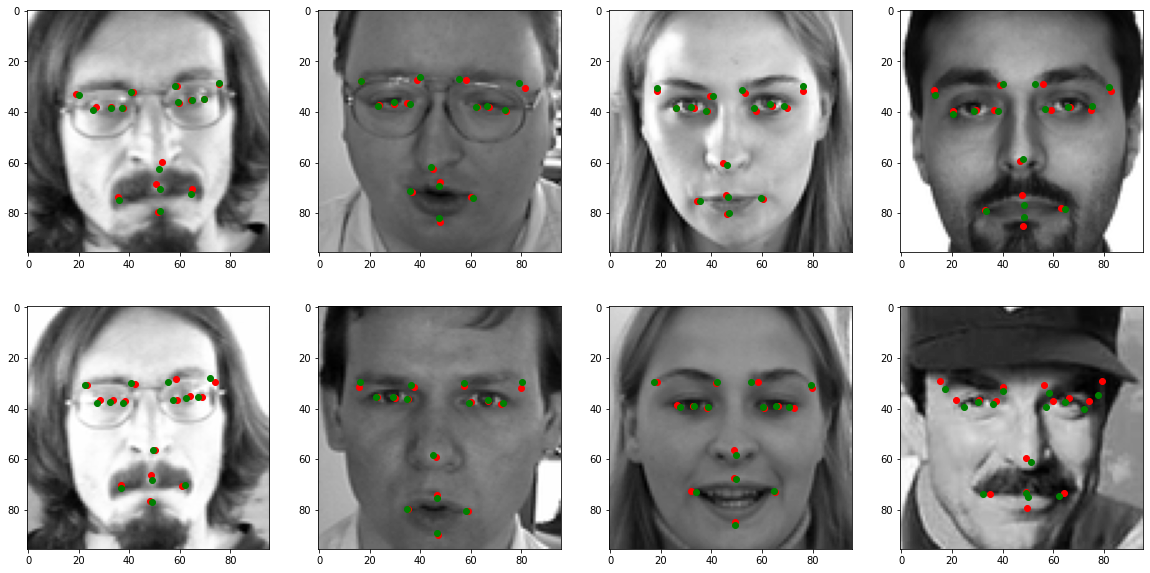

In [ ]:
# Facial Keypoints 표시

plt.figure(figsize = (20,10))
for idx in range(8):
  plt.subplot(2,4, idx+1)
  plt.imshow(X_val[idx].reshape(96,96), cmap='gray')
  for j in range(1,31,2):
    plt.plot(y_pred[idx][j-1],y_pred[idx][j],'ro')
    plt.plot(y_val[idx][j-1],y_val[idx][j],'go')
plt.show()

### 테스트

In [ ]:
# csv 읽기
# 문자열에서 이미지 데이터
# 모델에 적용해서 예측
# 사진하고 예측점 시각화

In [ ]:
df = pd.read_csv('/content/facial-keypoints-detection/test.csv')
df.shape

(1783, 2)

In [ ]:
df.head()

,ImageId,Image
0,1,182 183 182 182 180 180 176 169 156 137 124 10...
1,2,76 87 81 72 65 59 64 76 69 42 31 38 49 58 58 4...
2,3,177 176 174 170 169 169 168 166 166 166 161 14...
3,4,176 174 174 175 174 174 176 176 175 171 165 15...
4,5,50 47 44 101 144 149 120 58 48 42 35 35 37 39 ...


In [ ]:
df['Image'] = df['Image'].apply(lambda x : np.fromstring(x,dtype='int',sep=' ').reshape(96,96))
df['Image']

0       [[182, 183, 182, 182, 180, 180, 176, 169, 156,...
1       [[76, 87, 81, 72, 65, 59, 64, 76, 69, 42, 31, ...
2       [[177, 176, 174, 170, 169, 169, 168, 166, 166,...
3       [[176, 174, 174, 175, 174, 174, 176, 176, 175,...
4       [[50, 47, 44, 101, 144, 149, 120, 58, 48, 42, ...
                              ...                        
1778    [[101, 101, 101, 100, 100, 97, 97, 98, 102, 14...
1779    [[201, 191, 171, 158, 145, 140, 136, 130, 123,...
1780    [[28, 28, 29, 30, 31, 32, 33, 34, 39, 44, 46, ...
1781    [[104, 95, 71, 57, 46, 52, 65, 70, 70, 67, 76,...
1782    [[63, 61, 64, 66, 66, 64, 65, 70, 69, 70, 77, ...
Name: Image, Length: 1783, dtype: object

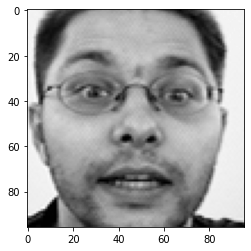

In [ ]:
plt.imshow(df['Image'][0], cmap='gray')
plt.show()

In [ ]:
images= []

for i in range(df.shape[0]):
  img = df.iloc[i,-1]
  images.append(img)

images = np.array(images)
images.shape

(1783, 96, 96)

In [ ]:
images[0]

array([[182, 183, 182, ..., 182, 182, 182],
       [182, 181, 181, ..., 182, 182, 182],
       [182, 181, 180, ..., 182, 181, 182],
       ...,
       [ 42,  36,  20, ..., 126, 136, 153],
       [ 31,   8,   0, ...,   9,  11,  33],
       [  3,   0,   1, ...,   8,   5,   5]])

In [ ]:
images = images.astype('float32')/255.
images = images.reshape(-1,96,96,1)
X_test = images
X_test.shape

(1783, 96, 96, 1)

In [ ]:
y_pred = model.predict(X_test)
y_pred.shape

56/56 [==============================] - 1s 10ms/step


(1783, 30)

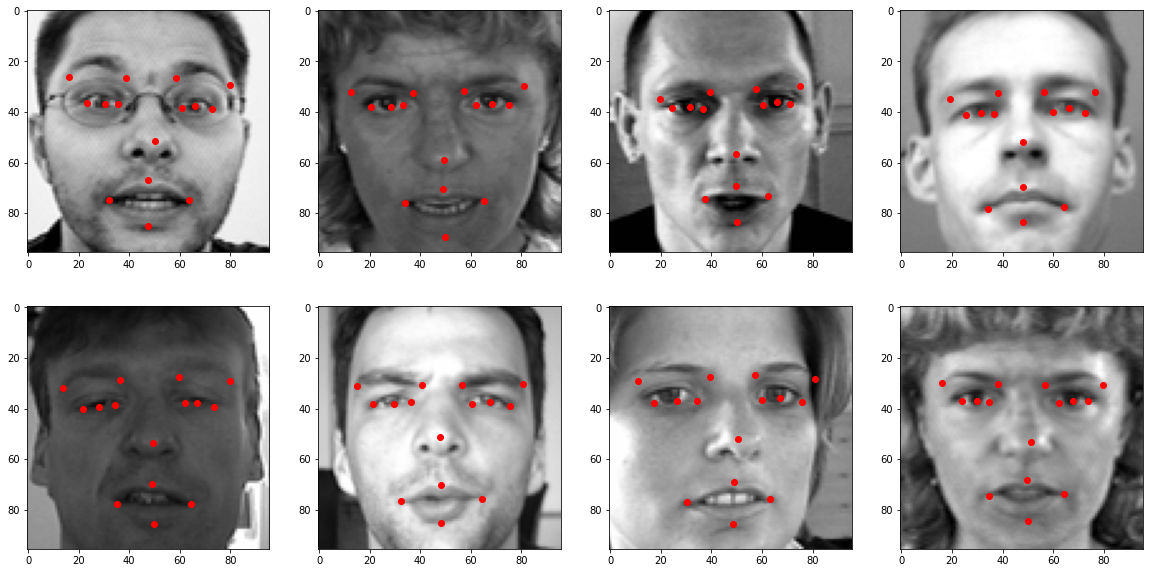

In [ ]:
# Facial Keypoints 표시

plt.figure(figsize = (20,10))
for idx in range(8):
  plt.subplot(2,4, idx+1)
  plt.imshow(X_test[idx].reshape(96,96), cmap='gray')
  for j in range(1,31,2):
    plt.plot(y_pred[idx][j-1],y_pred[idx][j],'ro')
plt.show()